In [42]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Just to check data type
df_market_data.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

array([[<Axes: title={'center': 'price_change_percentage_24h'}>,
        <Axes: title={'center': 'price_change_percentage_7d'}>,
        <Axes: title={'center': 'price_change_percentage_14d'}>],
       [<Axes: title={'center': 'price_change_percentage_30d'}>,
        <Axes: title={'center': 'price_change_percentage_60d'}>,
        <Axes: title={'center': 'price_change_percentage_200d'}>],
       [<Axes: title={'center': 'price_change_percentage_1y'}>, <Axes: >,
        <Axes: >]], dtype=object)

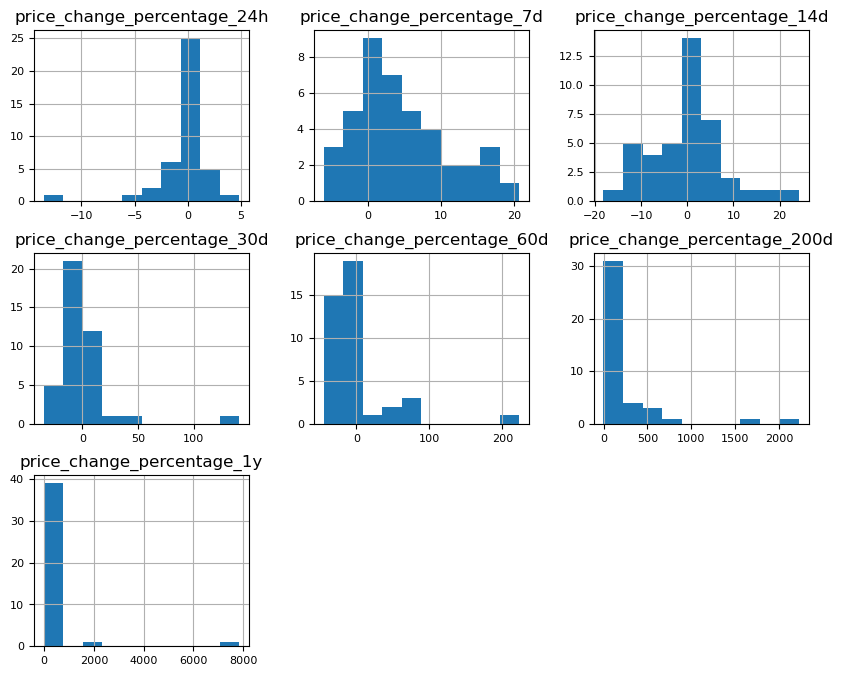

In [5]:
# Exploration of data
df_market_data.hist(xlabelsize=8, ylabelsize=8, figsize=(10,8))

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", 
                    "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]]
)

In [8]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    market_data_scaled,
    columns=['price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d',
             "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)


# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index
df_market_data_scaled.head(10)

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [9]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [10]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k :
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data = pd.DataFrame(elbow_data)

# Review elbow data frame
df_elbow_data.head(10)

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


In [90]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_data.hvplot.line(
    x = 'k',
    y = 'inertia',
    title = 'Elbow Curve',
    xticks = k

)


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

In [13]:
# Answer the best k value based on the elbow curve
print('The best k value based on the Elbow Curve is 4.')

The best k value based on the Elbow Curve is 4.


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [14]:
# Initialize the K-Means model using the best value for k, which is k=4
model = KMeans(n_clusters=4, random_state=1)

In [15]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
k_4

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [17]:
# Create a copy of the DataFrame
df_market_data_scaled_predict = df_market_data_scaled.copy()

In [54]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_predict['predict_clusters']=k_4

# Display sample data
df_market_data_scaled_predict.tail(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predict,predict_clusters
coin_id,,,,,,,,,
ethereum-classic,-0.071312,-0.229484,-0.175544,0.051882,-0.551760,-0.526060,-0.273062,1,1
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625,0,0
maker,-0.125168,0.580730,-0.202356,0.582911,-0.395923,-0.358240,-0.273433,3,3
havven,-1.428574,-0.025510,-1.628859,-0.860354,-0.840714,0.898815,0.268647,1,1
omisego,1.919812,0.370447,-1.619761,-0.409716,1.696480,0.811207,-0.021888,1,1
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,2,2
ontology,-0.409044,-0.906963,-1.298986,-1.393153,-0.696937,-0.422835,-0.292344,1,1
ftx-token,0.414711,0.414044,-0.047386,-0.465380,0.128185,-0.416502,-0.145469,1,1
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747,1,1


In [56]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_scaled_predict.hvplot.scatter(
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    by = 'predict_clusters',
    hover_cols = ['coin_id']
)

:NdOverlay   [predict_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [21]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [22]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [23]:
# Answer to the quesiton - what is the total explained variance of the three principal components
print(f'Total variance from the three PCAs is roughtly 89.5%.')

Total variance from the three PCAs is roughtly 89.5%.


In [24]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(
    market_data_pca,
    columns= ['PCA1','PCA2','PCA3']
)


# Copy the crypto names from the original data
df_market_data_pca['Coin_ID'] = df_market_data_scaled.index

# Set the coinid column as index
df_market_data_pca = df_market_data_pca.set_index('Coin_ID')

# Display sample data
df_market_data_pca.head(10)

,PCA1,PCA2,PCA3
Coin_ID,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [27]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1,11))

In [64]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_pca :
    k_pca_model = KMeans(n_clusters=i, random_state=1)
    k_pca_model.fit(df_market_data_pca)
    inertia_pca.append(k_pca_model.inertia_)

c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [65]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k_pca':k_pca,
    'inertia_pca': inertia_pca
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data_pca = pd.DataFrame(elbow_data_pca)

In [66]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_data_pca.hvplot.line(
    x = 'k_pca',
    y = 'inertia_pca',
    title = 'Elbow Curve Using PCA Method', xticks = k_pca
)

:Curve   [k_pca]   (inertia_pca)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [67]:
# Initialize the K-Means model using the best value for k, k =4 from Elbow Curve
model_pca_4 = KMeans(n_clusters=4, random_state=1)

In [68]:
# Fit the K-Means model using the PCA data
model_pca_4.fit(df_market_data_scaled)

c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julo1\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [69]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4_pca = model_pca_4.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
k_4_pca

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [70]:
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_predict = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca_predict['Predict_PCA_Clusters']= k_4_pca

# Display sample data
df_market_data_pca_predict.head(10)

,PCA1,PCA2,PCA3,Predict_PCA_Clusters
Coin_ID,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,3
binancecoin,-0.516534,1.388377,0.804071,3
chainlink,-0.450711,0.517699,2.846143,3
cardano,-0.345600,0.729439,1.478013,3
litecoin,-0.649468,0.432165,0.600303,3


In [71]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import holoviews as hv
df_market_data_pca_predict.hvplot.scatter(
    x= 'PCA1',
    y = 'PCA2',
    by = 'Predict_PCA_Clusters',
    title = 'PCA1 vs PCA2',
    hover_cols = 'Coin_ID'
    
)


:NdOverlay   [Predict_PCA_Clusters]
   :Scatter   [PCA1]   (PCA2,Coin_ID)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [73]:
# Composite plot to contrast the Elbow curves
# Make a composit elbow data from df_elbow_data and make a column, 'inertia_pca' from df_elbow_data_pca
composite_elbow_data = df_elbow_data.copy()
composite_elbow_data['inertia_pca'] = df_elbow_data_pca['inertia_pca']
composite_elbow_data

,k,inertia,inertia_pca
0,1,287.000000,256.874086
1,2,195.820218,165.901994
2,3,123.190482,93.774626
3,4,79.022435,49.665497
4,5,65.405923,38.352251
5,6,52.933559,27.618972
6,7,47.983124,21.134056
7,8,37.288187,17.437664
8,9,33.061685,13.742792
9,10,28.779752,10.484890


In [94]:
# Plot the composite elbow data to contrast Elbow Curves
composite_elbow_data.hvplot.line(
    x = 'k',
    y = ['inertia','inertia_pca'],
    xlabel = 'K',
    ylabel = 'Inertia',
    xticks = k,
    title = 'KMeans vs Identified Innertia from Original Scale Data and from PCA Data'
)

:NdOverlay   [Variable]
   :Curve   [k]   (value)

In [ ]:
# Composite plot to contrast the clusters

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 